In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import SGD
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [2]:
# load dataset
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [9]:
# normalize to range 0-1
trainX = trainX / 255.0
testX = testX / 255.0

In [10]:
def mlp_model(hidden_neuron):
  model = Sequential([
      Flatten(input_shape=(28, 28)),
      Dense(hidden_neuron, activation='relu'),
      Dense(10, activation='softmax')
  ])
  return model

In [11]:
#parameters
optimizer = SGD(learning_rate=0.001)
loss_function = 'sparse_categorical_crossentropy'
num_epochs = 50

In [12]:
#training model with different number of neurons
hidden_neuron_list = [16, 32, 64, 128]
training_history=[]

for hidden_neuron in hidden_neuron_list:
    model = mlp_model(hidden_neuron)
    model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])

    training = model.fit(trainX, trainY, epochs=num_epochs, validation_split=0.2, verbose=0)
    training_history.append(training)

    test_loss, test_accuracy = model.evaluate(testX, testY, verbose=0)
    print(f"Hidden Units: {hidden_neuron}")
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print("-----------------------------------")


Hidden Units: 16
Test Loss: 0.4795
Test Accuracy: 0.8336
-----------------------------------
Hidden Units: 32
Test Loss: 0.4764
Test Accuracy: 0.8345
-----------------------------------
Hidden Units: 64
Test Loss: 0.4644
Test Accuracy: 0.8397
-----------------------------------
Hidden Units: 128
Test Loss: 0.4541
Test Accuracy: 0.8394
-----------------------------------


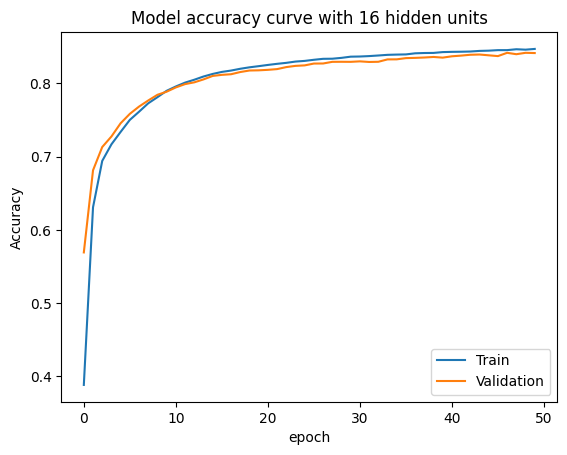

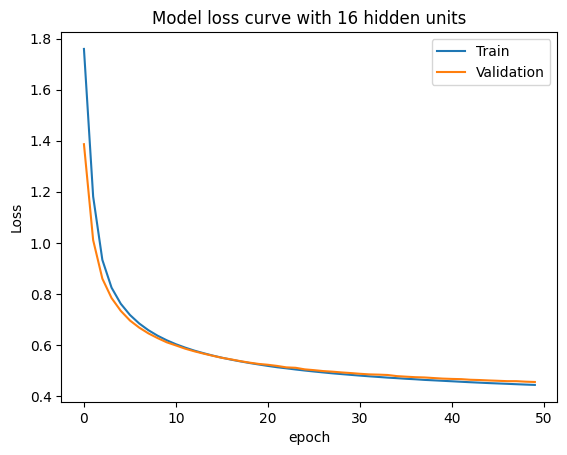

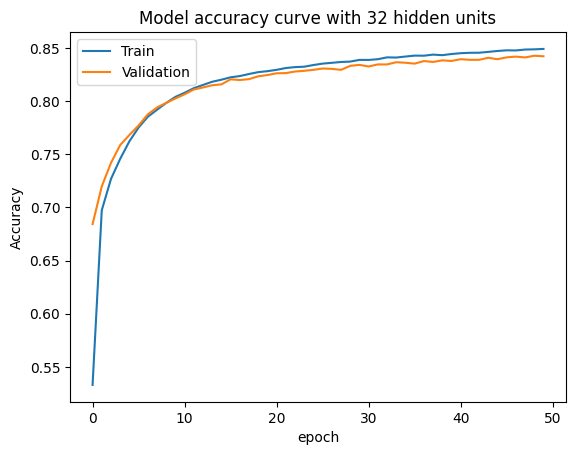

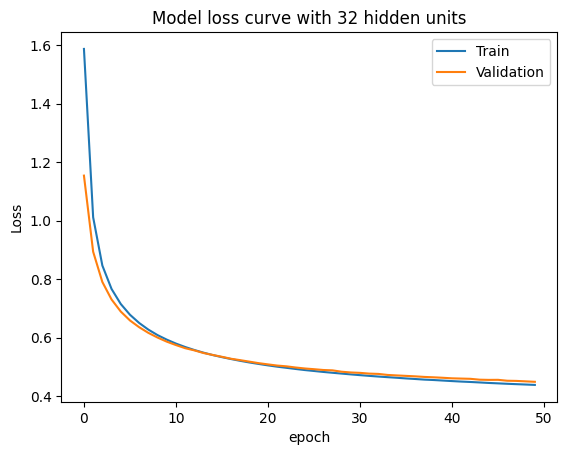

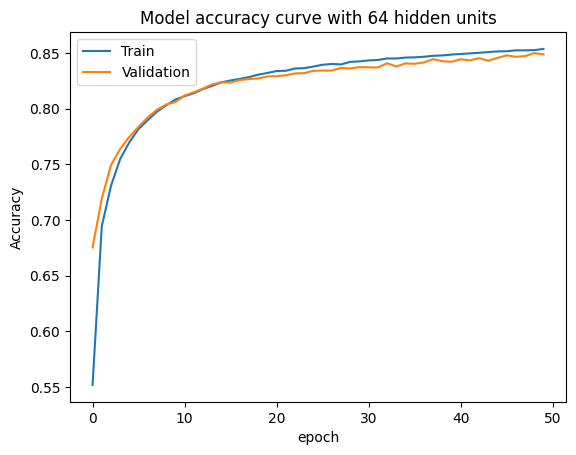

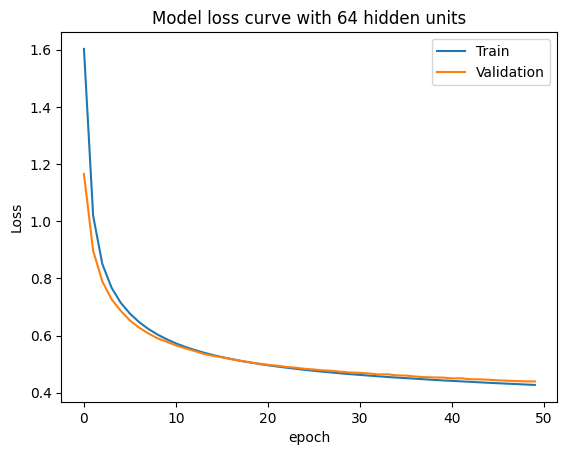

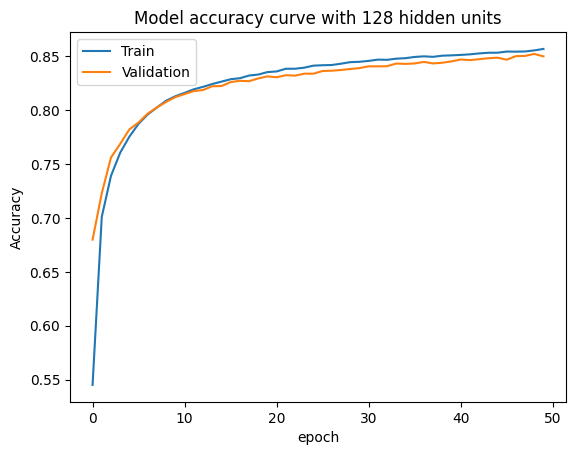

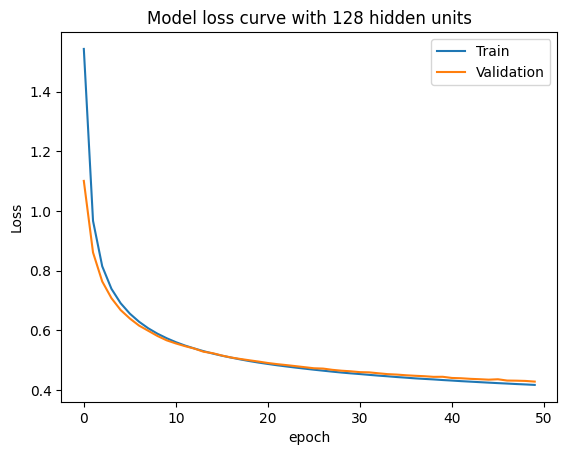

In [15]:
#plotting accuracy and loss of the models
i =0
for training in training_history:
  i +=1
  plt.plot(training.history['accuracy'], label="Train")
  plt.plot(training.history['val_accuracy'], label="Validation")
  plt.title(f"Model accuracy curve with {8 * (2**i)} hidden units")
  plt.xlabel('epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc='best')
  plt.savefig(f"AccuracyCurve{8 * (2**i)}Units.png")
  plt.show()

  plt.plot(training.history['loss'], label="Train")
  plt.plot(training.history['val_loss'], label="Validation")
  plt.title(f"Model loss curve with {8 * (2**i)} hidden units")
  plt.xlabel('epoch')
  plt.ylabel('Loss')
  plt.legend(loc='best')
  plt.savefig(f"LossCurve{8 * (2**i)}Units.png")
  plt.show()

In [16]:
from tensorflow.keras.preprocessing import image

def predictProccessing(image_prediction):
  img = image.img_to_array(image_prediction)
  img = img.reshape(1, 28, 28, 1)
  img = img.astype('float32')
  img = img / 255.0
  predicted_probabilities = model.predict(img)
  print(predicted_probabilities[0])
  predicted_class = np.argmax(predicted_probabilities)
  print(f"Predicted class of the image is: {predicted_class}")

predictProccessing(image.load_img("/content/sample_image0.png", grayscale=True, target_size=(28, 28)))
predictProccessing(image.load_img("/content/sample_image1.png", grayscale=True, target_size=(28, 28)))
predictProccessing(image.load_img("/content/sample_image2.png", grayscale=True, target_size=(28, 28)))

1/1 [==============================] - 0s 77ms/step
[3.1130060e-04 5.0956764e-06 9.3715662e-01 2.3300701e-05 1.1025020e-02
 3.6311261e-09 5.1408712e-02 1.6955028e-11 6.9934606e-05 1.1838878e-09]
Predicted class of the image is: 2
1/1 [==============================] - 0s 20ms/step


/usr/local/lib/python3.10/dist-packages/keras/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


[1.8553745e-02 1.0257216e-02 9.0127252e-02 8.9840926e-03 1.8855157e-01
 4.2967545e-04 6.2087864e-01 1.1917571e-05 6.2104505e-02 1.0142792e-04]
Predicted class of the image is: 6
1/1 [==============================] - 0s 17ms/step
[1.7829187e-05 2.1937060e-06 3.2054959e-04 1.9308933e-05 2.4655470e-04
 5.7160272e-04 3.5908274e-04 8.9253590e-06 9.9843293e-01 2.0921025e-05]
Predicted class of the image is: 8
